<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Взаимосвязи-в-данных" data-toc-modified-id="Взаимосвязи-в-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Взаимосвязи в данных</a></span><ul class="toc-item"><li><span><a href="#Пол-клиента,-день-недели-и-чаевые" data-toc-modified-id="Пол-клиента,-день-недели-и-чаевые-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Пол клиента, день недели и чаевые</a></span></li><li><span><a href="#Корреляции" data-toc-modified-id="Корреляции-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Корреляции</a></span></li></ul></li><li><span><a href="#Разные-свойства" data-toc-modified-id="Разные-свойства-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разные свойства</a></span><ul class="toc-item"><li><span><a href="#cdf-и-правило-3-сигм" data-toc-modified-id="cdf-и-правило-3-сигм-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>cdf и правило 3 сигм</a></span></li><li><span><a href="#Куртозис-и-эксцесс" data-toc-modified-id="Куртозис-и-эксцесс-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Куртозис и эксцесс</a></span></li><li><span><a href="#Гистограмма-и-kde" data-toc-modified-id="Гистограмма-и-kde-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Гистограмма и kde</a></span></li><li><span><a href="#Стандартизация" data-toc-modified-id="Стандартизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Стандартизация</a></span></li><li><span><a href="#Сдвиги-по-осям-X-и-Y" data-toc-modified-id="Сдвиги-по-осям-X-и-Y-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Сдвиги по осям X и Y</a></span></li><li><span><a href="#Кодирование-категориальных-переменных" data-toc-modified-id="Кодирование-категориальных-переменных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Кодирование категориальных переменных</a></span></li></ul></li></ul></div>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  Взаимосвязи в данных

В этой тетрадке мы поговорим про корреляции.

In [2]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')#don't forget to connect dataset!

In [3]:
from statsmodels.api import qqplot

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Будем использовать небольшой набор данных по тому, как люди платят чаевые.

In [6]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Пол клиента, день недели и чаевые

__Посмотрим как между собой ваимосвязаны счёт, чаевые и пол клиента.__

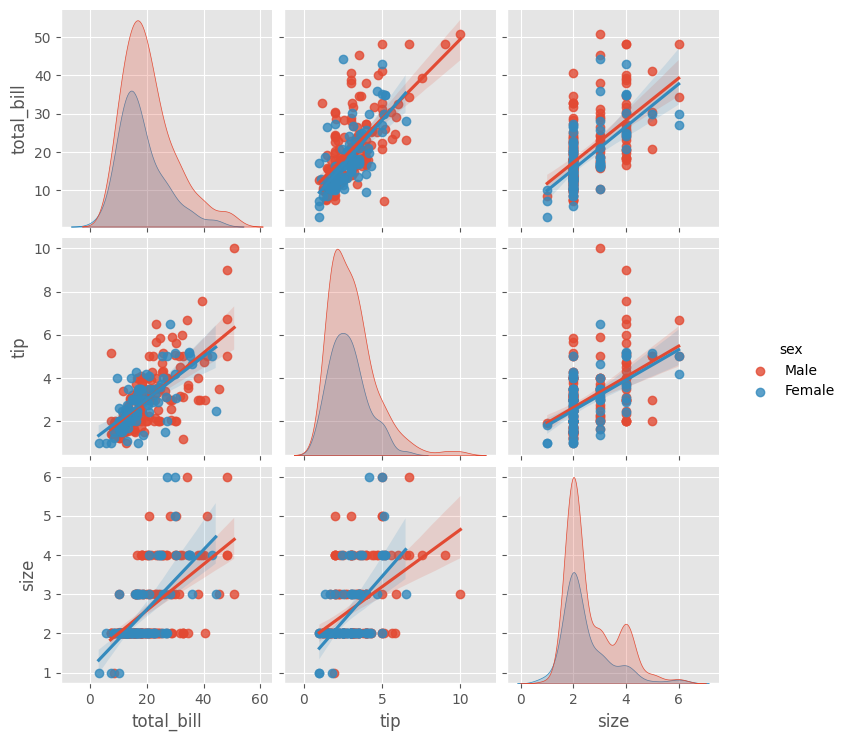

In [7]:
sns.pairplot(df, hue='sex', height=2.5, kind='reg', ); #kind = 'reg'

- Видно, что общий счёт и величина чаевых зависят друг от друга: чем больше счёт, тем больше чаевых оставляют
- Пол никак не влияет на то, какое количество чаевых оставлено, красные и синие точки на графиках распределены равномерно, плотности на диагонали выглядят похожим образом.

__Посмотрим на разбиение по дням недели.__

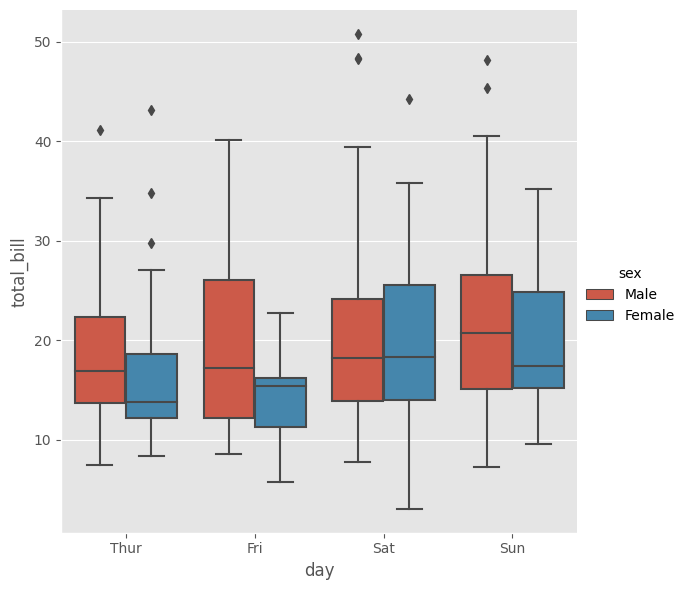

In [8]:
sns.catplot(x="day", y="total_bill", hue="sex", data=df, kind="box", height=6);

- Почему-то в пятницу мужчины платят больше чаевых, чем женщины. Возможно, что это как-то связано с пятничными свиданиями и с древней традицией: счёт оплачивает мужчина. Но правда ли это так?

__Давайтте посмотрим сколько наблюдений приходится на какой день недели.__

1708

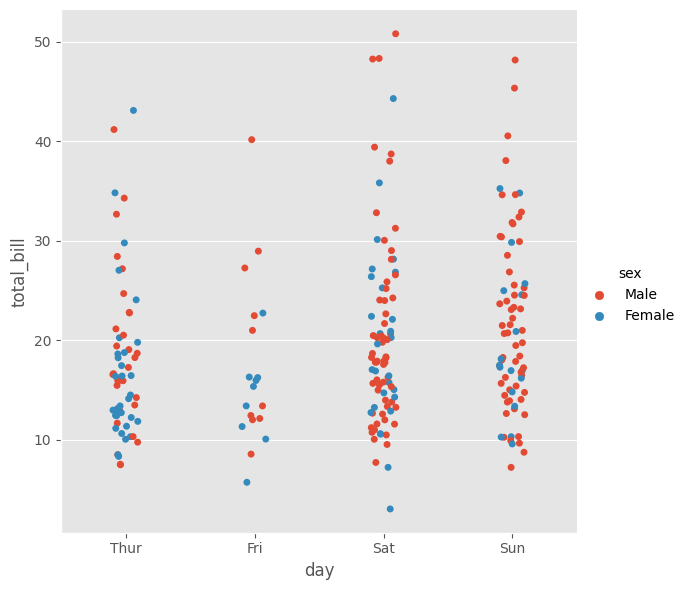

In [11]:
sns.catplot(x="day", y="total_bill", hue="sex", data=df, height=6);
df.size

- Более подробный взгляд на данные показывает, что это связано не с тем, что счёт оплачивает мужчина, а с тем, что в выборке мало данных с пятницы. Из-за этого мы видим такую разницу между чаевыми.
- В будущем мы будем говорить про статистические тесты. Они будут помогать нам отличать случайную разницу, как в этом примере, от настоящей.

## Корреляции

__Можно посмотреть на взаимосвязь только двух переменных.__

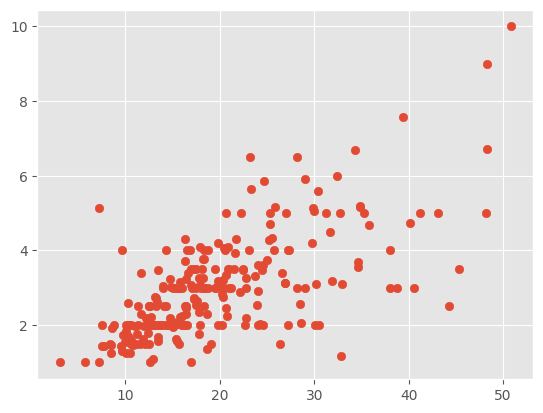

In [12]:
plt.scatter(df['total_bill'], df['tip']);

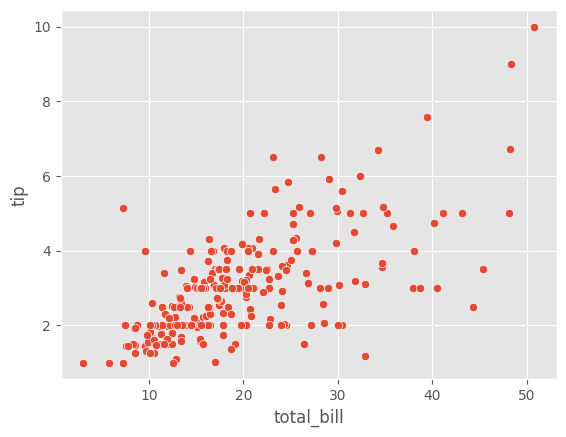

In [13]:
sns.scatterplot(x="total_bill", y="tip", data=df);

In [27]:
example = pd.concat([df[['tip']],(df[['total_bill']])],axis=1)

In [28]:
example.corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


In [29]:
example.corr(method='spearman')

,tip,total_bill
tip,1.000000,0.678968
total_bill,0.678968,1.000000


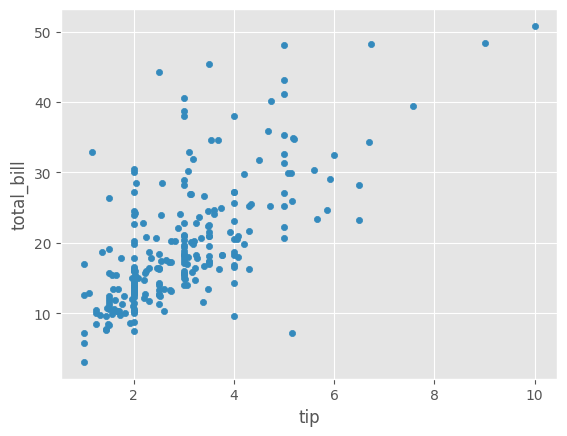

In [30]:
example.plot(kind='scatter', x='tip', y='total_bill');

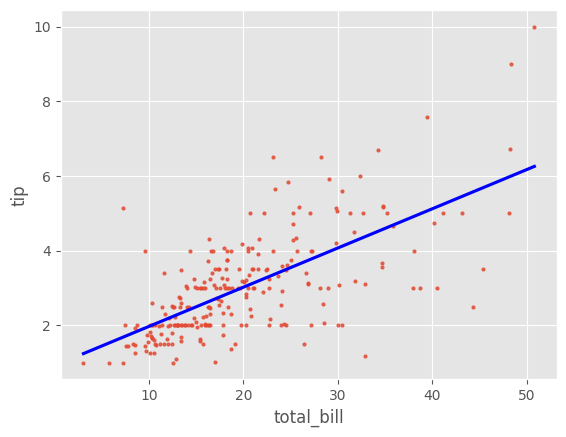

In [31]:
sns.regplot(x="total_bill", y="tip", data=df,
            line_kws={'color':'blue'},
            scatter_kws={'s':4},
            ci=None
           );

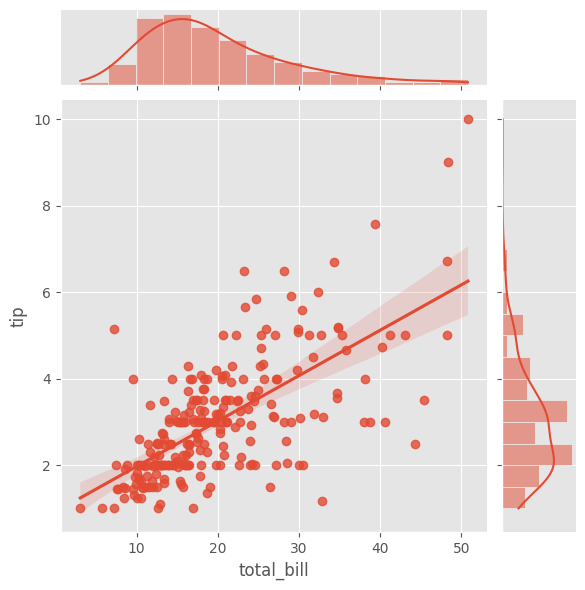

In [32]:
sns.jointplot(x="total_bill", y="tip", data=df, kind='reg');

- Снова видим, что чем больше общий счёт, тем большую сумму оставляют в качестве чаевых. Хочется провести сквозь точки линию регрессии.

__Посмотрим на ковариационную матрицу.__

In [33]:
df.corr()#method='pearson')

<ipython-input-33-2ca736384876>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()#method='pearson')


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [34]:
df.corr(method='spearman')

<ipython-input-34-657b2ea90450>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


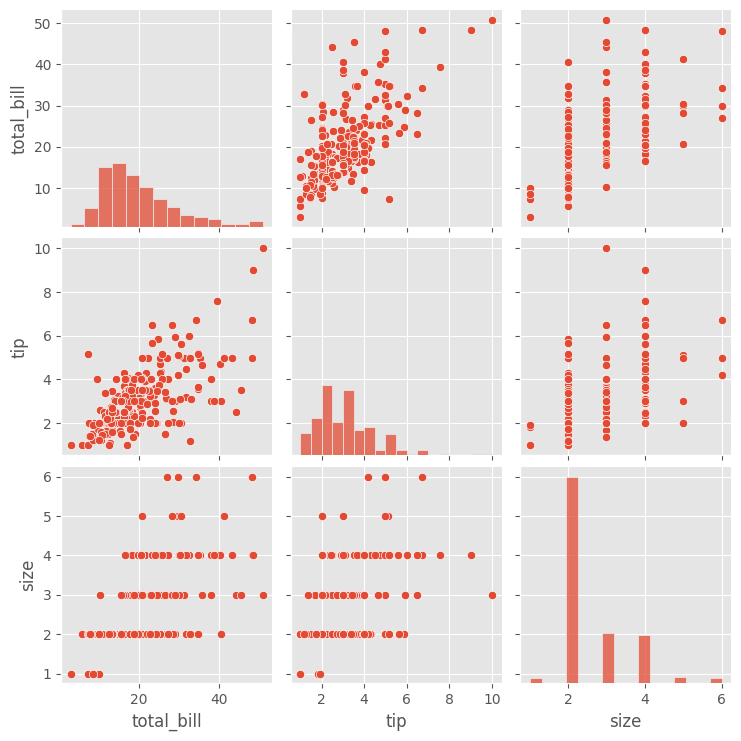

In [35]:
sns.pairplot(df, kind='scatter', );

Можно визуализировать матрицу с помощью тепловой карты.

<ipython-input-36-e6b3d7632e07>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


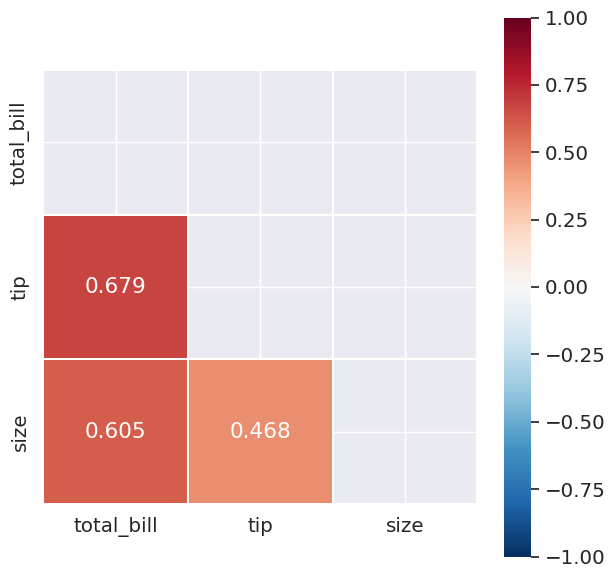

In [36]:
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))


sns.set(font_scale=1.3)
plt.subplots(figsize=(7, 7))

sns.heatmap(corr, mask=mask,
            square=True,
            annot=True, fmt=".3f",
            linewidths=0.2, cmap="RdBu_r",
            vmin=-1, vmax=1, center=0
           );

- Видно, что корреляция Спирмэна и Пирсона не сильно отличаются друг от друга в нашем примере. Это связано с тем, что взаимосвязи в данных линейные.

__Пример с рангами из презентации:__

Корреляция Спирмэна - это корреляция Пирсона, которую посчитали между рангами.

In [43]:
x = np.array([10, 8, 6, 7, 4, 10, 9, 5])
y = np.array([9, 9, 4, 5, 6, 8, 10, 7])

stats.spearmanr(x, y).correlation

0.644578313253012

In [41]:
rx = np.array([7.5, 5, 3, 4, 1, 7.5, 6, 2])
ry = np.array([6.5, 6.5, 1, 2, 3, 5, 8, 4])

stats.pearsonr(x, y)[0]

0.661879276575521

# Разные свойства

## cdf и правило 3 сигм

In [44]:
stats.norm.cdf(2)

0.9772498680518208

In [45]:
for i in range(1,4):
    print(i, stats.norm.cdf(i) - stats.norm.cdf(-i))

1 0.6826894921370859
2 0.9544997361036416
3 0.9973002039367398


## Куртозис и эксцесс

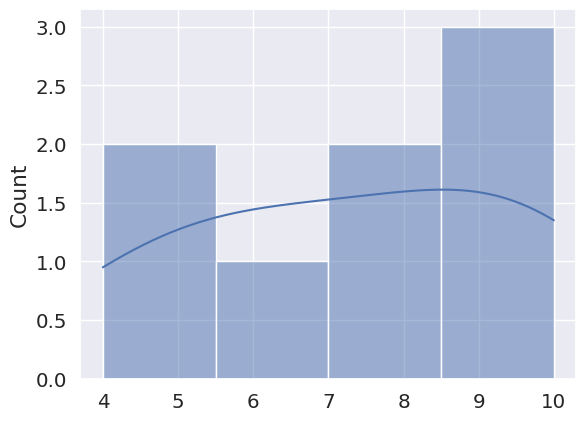

In [46]:
sns.histplot(x, kde=True);

In [47]:
x.mean() - 3*x.std(), x.mean() + 3*x.std()
# в диапозон 3 mu +/- 3*sigma лежат почти все данные

(1.022097120213469, 13.72790287978653)

In [48]:
stats.kurtosis(x) - 3 # не равно 0 - хвосты менее тяжелые, чем у нормально распределения

-4.33882892835897

In [49]:
stats.skew(x) # коэффицент ассиметрии > 0 - перекос вправо

-0.18140353255785455

0.18140353255785455

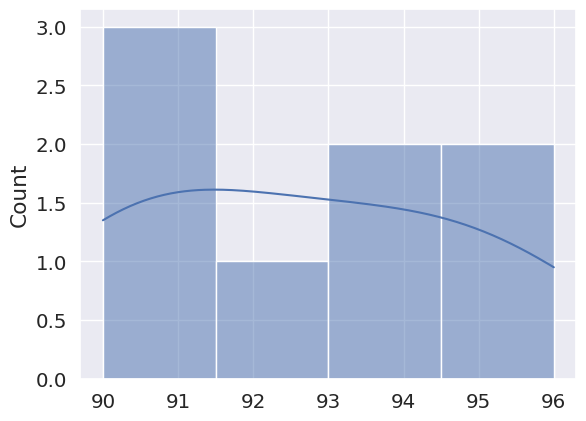

In [52]:
sns.histplot(100-x, kde=True);
# перекос влево
stats.skew(100-x)

## Гистограмма и kde

In [53]:
x.plot(kind='hist');

AttributeError: ignored

In [54]:
x.plot(kind='kde');

AttributeError: ignored

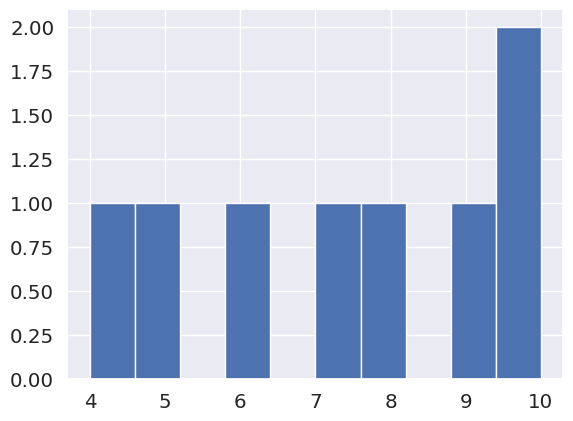

In [55]:
plt.hist(x);

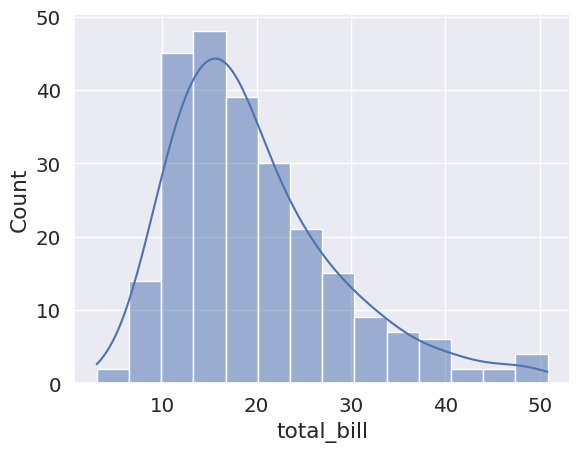

In [56]:
# самый рекомендуемый способ гистограммы
sns.histplot(data=df, x='total_bill', kde=True);

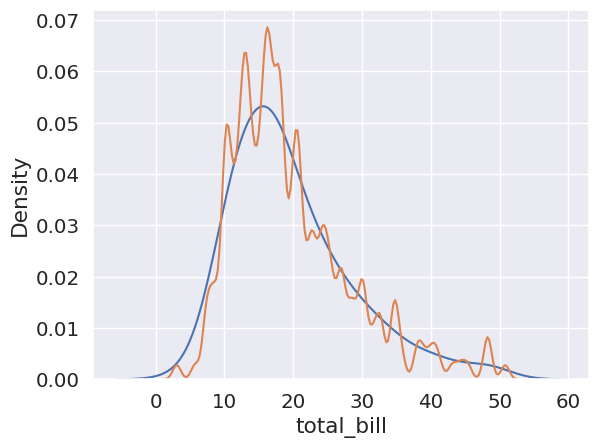

In [57]:
sns.kdeplot(data=df, x='total_bill', bw_adjust=1);
sns.kdeplot(data=df, x='total_bill', bw_adjust=0.2);

In [ ]:
sns.displot(data=df, x='total_bill');

In [ ]:
sns.distplot(df['total_bill']);

In [ ]:
sns.boxplot(x=df['total_bill']);

In [ ]:
sns.kdeplot(data=df, x='total_bill', hue='size', common_norm=False);

In [ ]:
sns.histplot(data=df, x='total_bill', hue='sex', common_norm=False, bins=10, stat='density');

In [ ]:
sns.kdeplot(data=df, x='total_bill', hue='sex', common_norm=False);#, bins=10, stat='density');

In [ ]:
sns.boxplot(data=df, x='total_bill', y='sex');

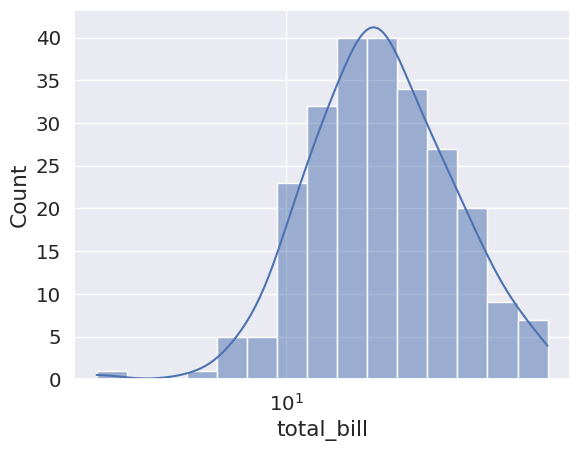

In [63]:
sns.histplot(data=df, x='total_bill', kde=True, log_scale=True);

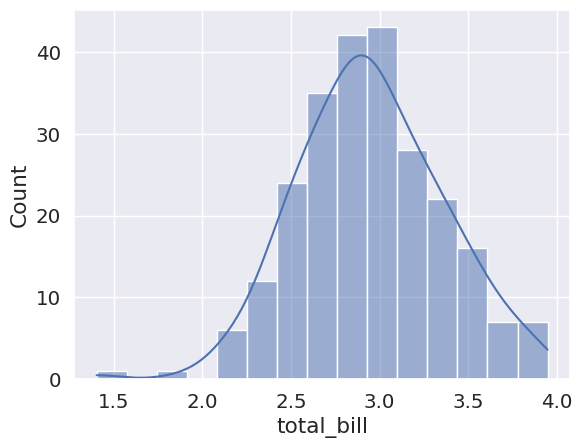

In [64]:
sns.histplot(np.log(1+df['total_bill']), kde=True);

In [59]:
# from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()
x_transformed = transformer.fit_transform(df[['total_bill']])

In [60]:
transformer.lambdas_

array([0.00806556])

In [65]:
df['total_bill_boxcox'] = x_transformed
df['total_bill_log'] = np.log(1+df['total_bill'])

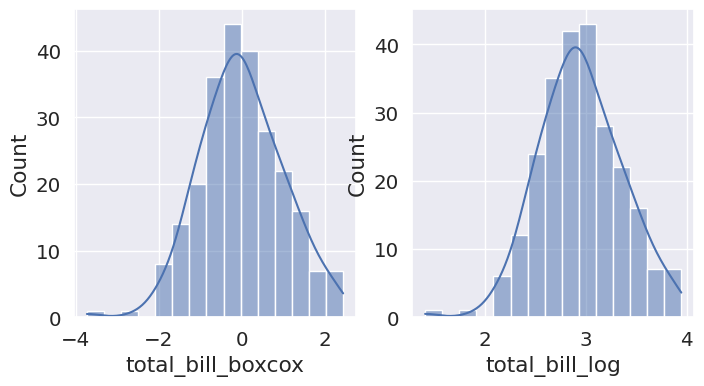

In [66]:
plt.figure(figsize=(8,4))


plt.subplot(121)
sns.histplot(df['total_bill_boxcox'], kde=True);

plt.subplot(122)
sns.histplot(df['total_bill_log'], kde=True);

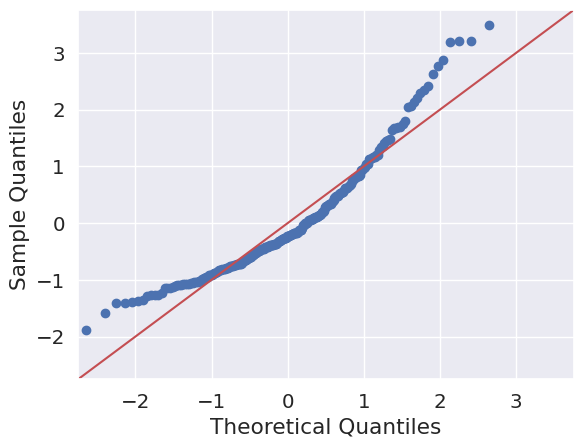

In [68]:
qqplot(df['total_bill'], fit=True, line='45')
plt.show()



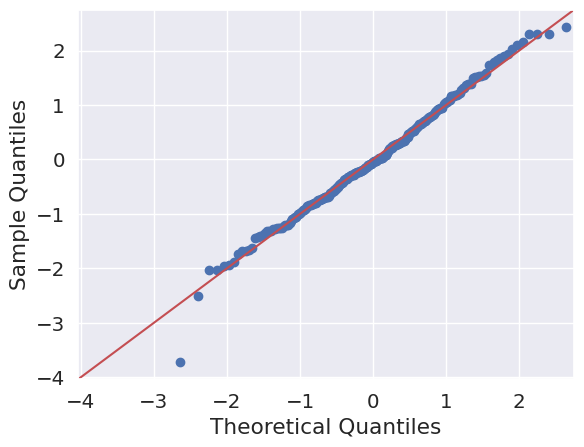

In [69]:
qqplot(df['total_bill_boxcox'], fit=True, line='45')
plt.show()

## Стандартизация

In [70]:
x = df['total_bill']

x.mean(), x.std()

(19.78594262295082, 8.902411954856856)

In [71]:
z = (x-x.mean())/x.std()

# стандартизация
z.mean(), z.std()

(-6.028875031263658e-17, 1.0)

## Сдвиги по осям X и Y

In [72]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_boxcox,total_bill_log
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.146272,2.889816
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.263499,2.428336
2,21.01,3.50,Male,No,Sun,Dinner,3,0.343298,3.091497
3,23.68,3.31,Male,No,Sun,Dinner,2,0.621586,3.205993
4,24.59,3.61,Female,No,Sun,Dinner,4,0.709646,3.242202


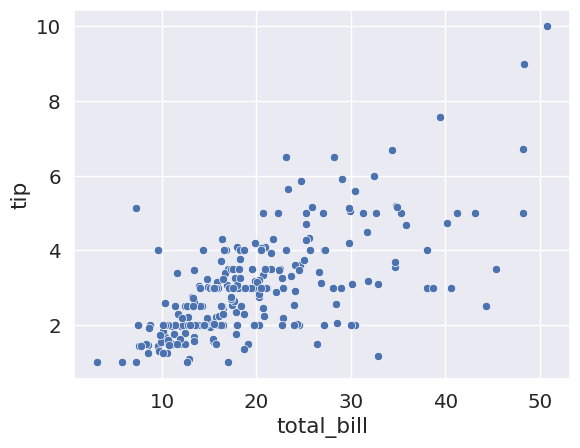

In [73]:
sns.scatterplot(data=df, x='total_bill', y='tip');

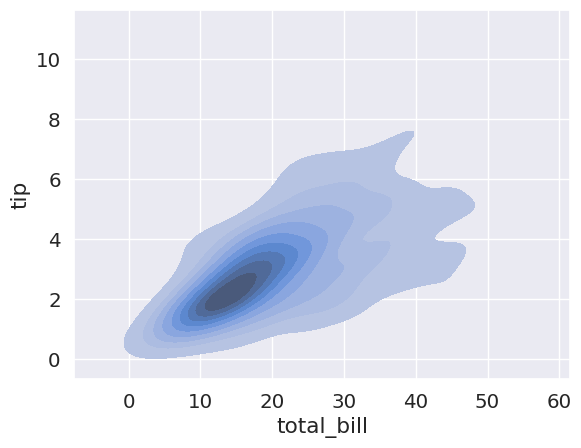

In [74]:
sns.kdeplot(data=df, x='total_bill', y='tip', fill=True,);

In [75]:
df.cov()

<ipython-input-75-6f98a29763d5>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,total_bill,tip,size,total_bill_boxcox,total_bill_log
total_bill,79.252939,8.323502,5.065983,8.593448,3.538954
tip,8.323502,1.914455,0.643906,0.912470,0.375816
size,5.065983,0.643906,0.904591,0.564807,0.232646
total_bill_boxcox,8.593448,0.912470,0.564807,1.004115,0.413791
total_bill_log,3.538954,0.375816,0.232646,0.413791,0.170522


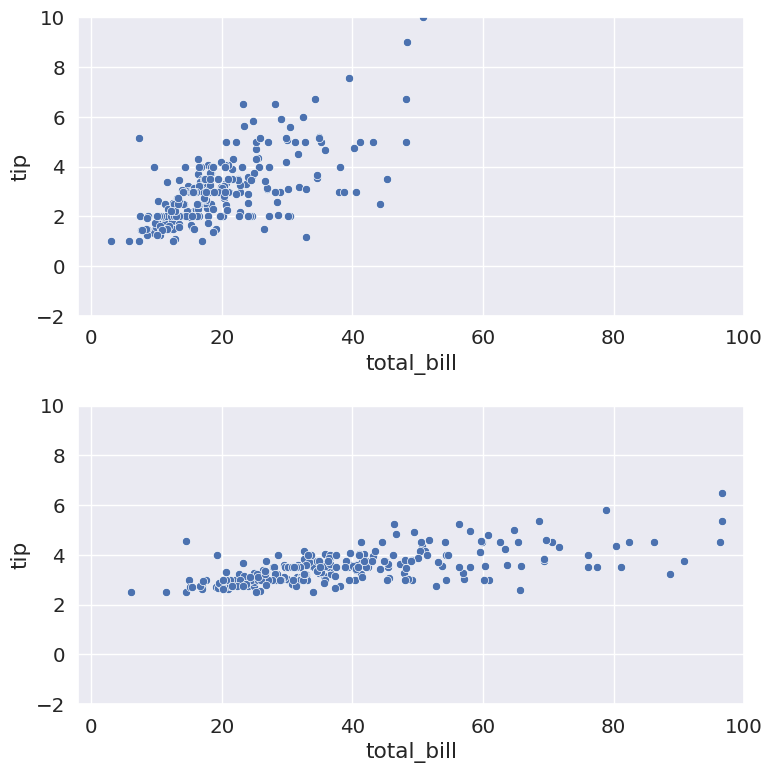

In [76]:
plt.figure(figsize=(8,8))

plt.subplot(211)
sns.scatterplot(x=df['total_bill'], y=df['tip']);
plt.xlim(-2,100)
plt.ylim(-2,10)


plt.subplot(212)
sns.scatterplot(x=df['total_bill']*2, y=2+df['tip']/2);
plt.xlim(-2,100)
plt.ylim(-2,10)

plt.tight_layout()
plt.show()

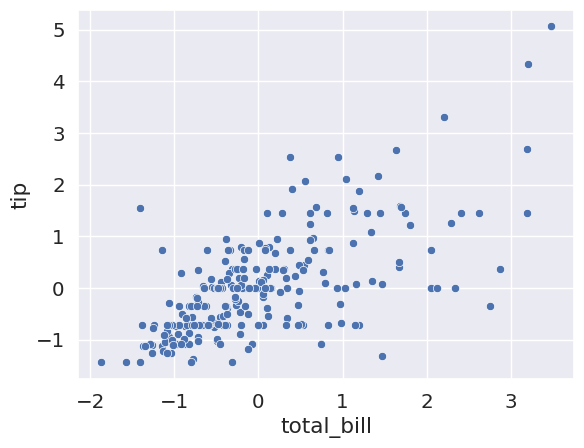

In [77]:
sns.scatterplot(x=(df['total_bill']-df['total_bill'].mean())/df['total_bill'].std(),
                y=(df['tip']-df['tip'].mean())/df['tip'].std());

## Кодирование категориальных переменных

In [78]:
pd.get_dummies(df, drop_first=True)

,total_bill,tip,size,total_bill_boxcox,total_bill_log,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,-0.146272,2.889816,1,1,0,0,1,1
1,10.34,1.66,3,-1.263499,2.428336,0,1,0,0,1,1
2,21.01,3.50,3,0.343298,3.091497,0,1,0,0,1,1
3,23.68,3.31,2,0.621586,3.205993,0,1,0,0,1,1
4,24.59,3.61,4,0.709646,3.242202,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1.099066,3.402197,0,1,0,1,0,1
240,27.18,2.00,2,0.944244,3.338613,1,0,0,1,0,1
241,22.67,2.00,2,0.519996,3.164208,0,0,0,1,0,1
242,17.82,1.75,2,-0.036853,2.934920,0,1,0,1,0,1


In [80]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

cat_cols = ['sex','smoker','day','time']
X = ohe.fit_transform(df[cat_cols])

In [81]:
X.toarray().shape

(244, 10)

In [82]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
cat_cols = ['sex','smoker','day','time']
X = ord_enc.fit_transform(df[cat_cols])

In [88]:
X[0:20,:]

array([[0., 0., 2., 0.],
       [1., 0., 2., 0.],
       [1., 0., 2., 0.],
       [1., 0., 2., 0.],
       [0., 0., 2., 0.],
       [1., 0., 2., 0.],
       [1., 0., 2., 0.],
       [1., 0., 2., 0.],
       [1., 0., 2., 0.],
       [1., 0., 2., 0.],
       [1., 0., 2., 0.],
       [0., 0., 2., 0.],
       [1., 0., 2., 0.],
       [1., 0., 2., 0.],
       [0., 0., 2., 0.],
       [1., 0., 2., 0.],
       [0., 0., 2., 0.],
       [1., 0., 2., 0.],
       [0., 0., 2., 0.],
       [1., 0., 1., 0.]])

In [83]:
ord_enc.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object),
 array(['Dinner', 'Lunch'], dtype=object)]

In [89]:
df['day']

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [91]:
df['day'].map({'Fri':0, 'Sat':14, 'Sun':2, 'Thur':3})

0       2
1       2
2       2
3       2
4       2
       ..
239    14
240    14
241    14
242    14
243     3
Name: day, Length: 244, dtype: category
Categories (4, int64): [3, 0, 14, 2]